In [25]:
# libraries
import nilearn
from nilearn.maskers import NiftiLabelsMasker
from nilearn import datasets
from nilearn import image as nimg
from nilearn import plotting as nplot
import nibabel as nib
import numpy as  np
import numpy.linalg as npl
from pathlib import Path
%matplotlib inline
import os

d = nilearn.datasets.fetch_atlas_basc_multiscale_2015(version='sym', data_dir=None, url=None, resume=True, verbose=1)

In [25]:
# loading data
basedir = Path("/data/hcp_working_folder/tdhore2")
datadir = basedir / "subj/106319/func" 
img = nib.load(datadir / 'rfMRI_REST2_RL.nii.gz')

imgdir = Path("/home/tdhore2/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym")
imgname = "template_cambridge_basc_multiscale_sym_scale444.nii.gz"
base_img = nib.load(imgdir / imgname)

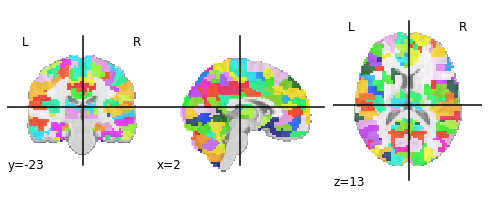

In [15]:
# plotting base image
y = nplot.plot_roi(base_img)

In [ ]:
# saving BASC parcellations
dataset = datasets.fetch_atlas_basc_multiscale_2015(version='sym', data_dir=None, url=None, resume=True, verbose=1)
atlas_filename = dataset.scale444
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
subs = ['123117','211922','178142','562446','704238','180230','168240','129331','419239','154330','137128']
files = ['REST1_LR', 'REST1_RL', 'REST2_LR', "REST2_RL"]

for sub in range(0,12):
    os.chdir('/data/hcp_working_folder/tdhore2/subj/' + subs[sub] + '/func')

    for pt in range(0,4):
        img = nib.load('rfMRI_' + files[pt] + '.nii.gz')
        if pt == 1:
            LR1 = masker.fit_transform(img)
        elif pt == 2:
            RL1 = masker.fit_transform(img)
        elif pt == 3:
            LR2 = masker.fit_transform(img)
        else: 
            RL2 = masker.fit_transform(img)

    np.savez('ts_123117', LR1 = LR1, RL1 = RL1, LR2 = LR2, RL2 = RL2)

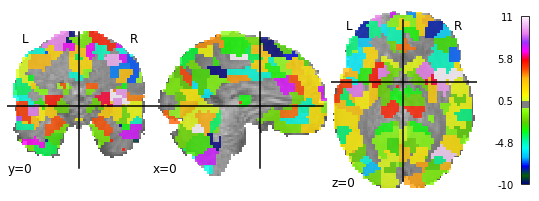

In [9]:
# plotting average BOLD activity in each BASC ROI
os.chdir('/data/hcp_working_folder/tdhore2/subj/106319/func')
npzfile = np.load('ts_106319.npz')
scan = npzfile['LR1']
ag = scan.mean(axis=0)
avg = ag * 100000

arr = np.array(base_img.dataobj)
x = np.zeros((53, 64, 52))
for roi in range(0,443):
    coords = np.where(arr == (roi + 1))
    x[coords] = avg[roi]
nii_img = nib.Nifti1Image(x, affine=base_img.affine, header=base_img.header)
y = nplot.plot_roi(nii_img, img.slicer[:, :, :, 30], cut_coords = (0, 0, 0), colorbar=True, alpha = 0.8, vmin=-10, vmax=11, black_bg=False, cbar_tick_format="%.2g")

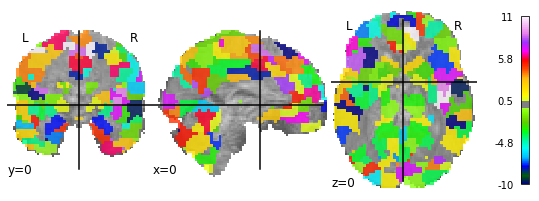

In [3]:
# plotting average BOLD activity in each BASC ROI
os.chdir('/data/hcp_working_folder/tdhore2/subj/106319/func')
npzfile = np.load('ts_106319.npz')
scan = npzfile['RL1']
ag = scan.mean(axis=0)
avg = ag * 100000

arr = np.array(base_img.dataobj)
a = np.zeros((53, 64, 52))
for roi in range(0,443):
    coords = np.where(arr == (roi + 1))
    a[coords] = avg[roi]
nii_img = nib.Nifti1Image(a, affine=base_img.affine, header=base_img.header)
y = nplot.plot_roi(nii_img, img.slicer[:, :, :, 30], cut_coords = (0, 0, 0), colorbar=True, alpha = 0.8, vmin=-10, vmax=11, black_bg=False, cbar_tick_format="%.2g")

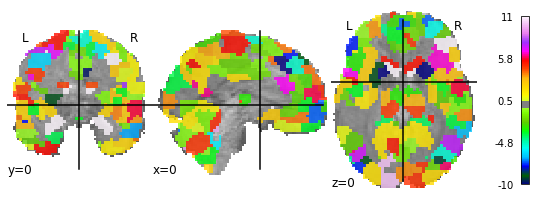

In [5]:
# plotting average BOLD activity in each BASC ROI
os.chdir('/data/hcp_working_folder/tdhore2/subj/106319/func')
npzfile = np.load('ts_106319.npz')
scan = npzfile['LR2']
ag = scan.mean(axis=0)
avg = ag * 100000

arr = np.array(base_img.dataobj)
b = np.zeros((53, 64, 52))
for roi in range(0,443):
    coords = np.where(arr == (roi + 1))
    b[coords] = avg[roi]
    nii_img = nib.Nifti1Image(b, affine=base_img.affine, header=base_img.header)
y = nplot.plot_roi(nii_img, img.slicer[:, :, :, 30], cut_coords = (0, 0, 0), colorbar=True, alpha = 0.8, vmin=-10, vmax=11, black_bg=False, cbar_tick_format="%.2g")

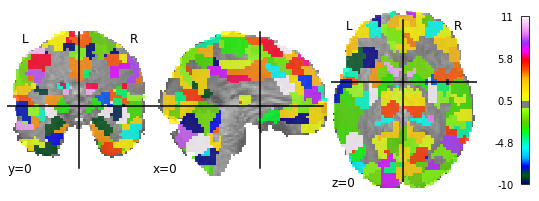

In [7]:
# plotting average BOLD activity in each BASC ROI
os.chdir('/data/hcp_working_folder/tdhore2/subj/106319/func')
npzfile = np.load('ts_106319.npz')
scan = npzfile['RL2']
ag = scan.mean(axis=0)
avg = ag * 100000

arr = np.array(base_img.dataobj)
c = np.zeros((53, 64, 52))
for roi in range(0,443):
    coords = np.where(arr == (roi + 1))
    c[coords] = avg[roi]
nii_img = nib.Nifti1Image(c, affine=base_img.affine, header=base_img.header)
y = nplot.plot_roi(nii_img, img.slicer[:, :, :, 30], cut_coords = (0, 0, 0), colorbar=True, alpha = 0.8, vmin=-10, vmax=11, black_bg=False, cbar_tick_format="%.2g")

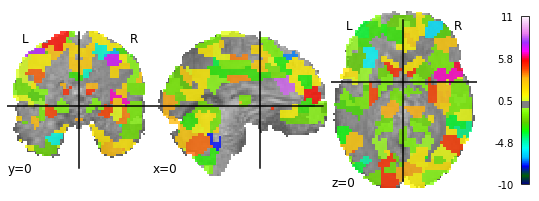

In [10]:
z = (a + b + c + x) / 4
nii_img = nib.Nifti1Image(z, affine=base_img.affine, header=base_img.header)
y = nplot.plot_roi(nii_img, img.slicer[:, :, :, 30], cut_coords = (0, 0, 0), colorbar=True, alpha = 0.8, vmin=-10, vmax=11, black_bg=False, cbar_tick_format="%.2g")

In [ ]:
# save functional connecitivity matrices for each scan from one subject
dataset = datasets.fetch_atlas_basc_multiscale_2015(version='sym', data_dir=None, url=None, resume=True, verbose=1)
atlas_filename = dataset.scale444
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
files = ['REST1_LR', 'REST1_RL', 'REST2_LR', "REST2_RL"]
correlation_measure = ConnectivityMeasure(kind='correlation')
os.chdir('/data/hcp_working_folder/tdhore2/subj/106319/func')

for pt in range(0,4):
    img = nib.load('rfMRI_' + files[pt] + '.nii.gz')
    if pt == 0:
        LR1 = masker.fit_transform(img)
        correlation_matrix1 = correlation_measure.fit_transform([LR1])[0]
    elif pt == 1:
        RL1 = masker.fit_transform(img)          
        correlation_matrix2 = correlation_measure.fit_transform([RL1])[0]
    elif pt == 2:
        LR2 = masker.fit_transform(img)
        correlation_matrix3 = correlation_measure.fit_transform([LR2])[0]
    else: 
        RL2 = masker.fit_transform(img)
        correlation_matrix4 = correlation_measure.fit_transform([RL2])[0]
np.savez('fc_106310', LR1 = correlation_matrix1, RL1 = correlation_matrix2, LR2 = correlation_matrix3, RL2 = correlation_matrix4)

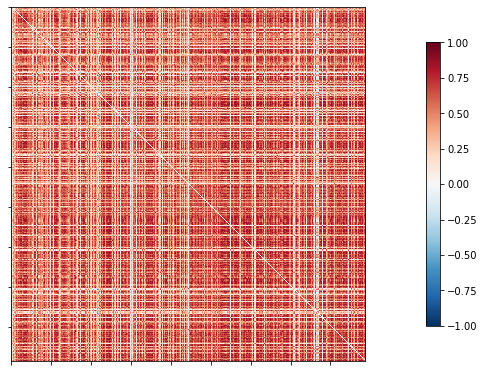

In [20]:
# load saved matrices and plot average
npzfile = np.load('fc_106310.npz')
LR1 = npzfile['LR1']
RL1 = npzfile['RL1']
LR2 = npzfile['LR2']
RL2 = npzfile['RL2']
np.fill_diagonal(LR1, 0)
plotting.plot_matrix(LR1, colorbar=True, vmax=1.0, vmin=-1.0)

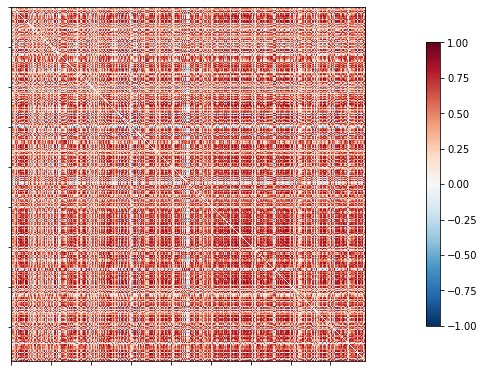

In [21]:
# plot just one matrix
np.fill_diagonal(RL1, 0)
plotting.plot_matrix(RL1, colorbar=True, vmax=1.0, vmin=-1.0)

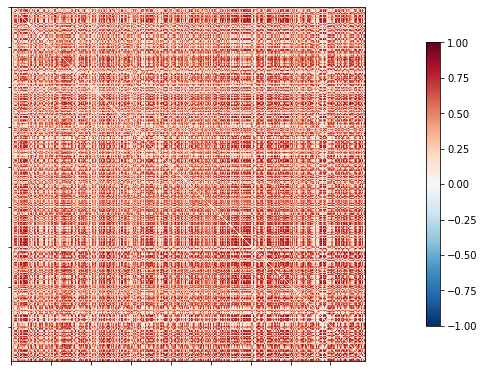

In [22]:
# plot just one matrix
np.fill_diagonal(LR2, 0)
plotting.plot_matrix(LR2, colorbar=True, vmax=1.0, vmin=-1.0)

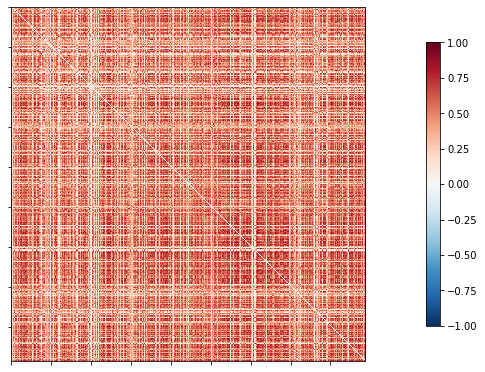

In [23]:
# plot just one matrix
np.fill_diagonal(RL2, 0)
plotting.plot_matrix(RL2, colorbar=True, vmax=1.0, vmin=-1.0)

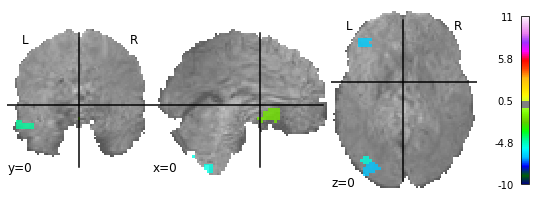

In [33]:
# plot BASC average ROIs
os.chdir('/data/hcp_working_folder/tdhore2/subj/106319/func')
npzfile = np.load('ts_106319.npz')
scan = npzfile['LR1']
ag = scan.mean(axis=0)
avg = ag * 100000

arr = np.array(base_img.dataobj)
c = np.zeros((53, 64, 52))
for roi in range(0,10):
    coords = np.where(arr == (roi + 1))
    c[coords] = avg[roi]
nii_img = nib.Nifti1Image(c, affine=base_img.affine, header=base_img.header)
y = nplot.plot_roi(nii_img, img.slicer[:, :, :, 30], cut_coords = (0, 0, 0), colorbar=True, alpha = 0.8, vmin=-10, vmax=11, black_bg=False, cbar_tick_format="%.2g")